### Importing Libraries

In [1]:
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import shutil
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2022-10-23 02:02:08.215023: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-23 02:02:08.215083: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Setup directories

In [2]:
IMG_PATH = '/home/jupyter/gurih_mas/digit_recognizer/dataset/221018_dataset'
LABEL_PATH = '/home/jupyter/gurih_mas/digit_recognizer/labels/221018_dataset'
MODEL_PATH = '/home/jupyter/gurih_mas/digit_recognizer/models/model_v3'
RESULT_PATH = '/home/jupyter/gurih_mas/digit_recognizer/results'

### Read true labels dataframe

In [3]:
df_truelabel = pd.read_csv(os.path.join(LABEL_PATH,'221018_DR_dataset_true_label.csv'), header=0, names=['ktp_pict','PIC','pred','true_label'])
df_pred = pd.read_csv(os.path.join(LABEL_PATH,'221018_Image_Samples.csv'), header=0, names=['ktp_pict','pred','PIC'])
df_pred_added = pd.read_csv(os.path.join(LABEL_PATH,'221018_Added_Image_Samples.csv'), header=0, names=['ktp_pict','pred','PIC'])
df_truelabel

,ktp_pict,PIC,pred,true_label
0,5842d07e-418f-44ce-af86-0d13a5a8984a_6.jpg,Mas Kemas,0,6
1,4e7153a7-a7bf-4d4e-9ffd-a6ef2c84e1c3_3.jpg,Mas Kemas,0,2
2,5c030af6-5f52-4ef0-99c7-309e9d753f52_9.jpg,Mas Kemas,0,0
3,5c030af6-5f52-4ef0-99c7-309e9d753f52_10.jpg,Mas Kemas,0,0
4,00e1b1b4-a9b8-42ed-9dad-64c2c78e6ad2_0.jpg,Mas Kemas,0,7
...,...,...,...,...
4797,00271205-38de-4d83-8fad-3ca0475507be_3.jpg,Addin,9,9
4798,016c3300-c674-480c-87df-e4c8d9e0c9ba_5.jpg,Addin,9,9
4799,0147d75d-332d-414f-bd68-6ab46b89e1b0_10.jpg,Addin,9,9
4800,00178766-d1f9-406b-9e77-57dbc7ec5c42_10.jpg,Addin,9,9


In [4]:
df_pred

,ktp_pict,pred,PIC
0,5842d07e-418f-44ce-af86-0d13a5a8984a_6.jpg,0,Mas Kemas
1,4e7153a7-a7bf-4d4e-9ffd-a6ef2c84e1c3_3.jpg,0,Mas Kemas
2,5c030af6-5f52-4ef0-99c7-309e9d753f52_0.jpg,0,Mas Kemas
3,5c030af6-5f52-4ef0-99c7-309e9d753f52_1.jpg,0,Mas Kemas
4,5c030af6-5f52-4ef0-99c7-309e9d753f52_3.jpg,0,Mas Kemas
...,...,...,...
4930,01939003-2e65-4cea-b732-ef7162860d59_15.jpg,9,Vanda
4931,01cb6fd3-1e6e-48a3-b32f-bbaf8bc9b816_5.jpg,9,Vanda
4932,354f4e1c-5906-44ca-8ee0-b3d8aa99352c_11.jpg,9,Vanda
4933,01b66808-6057-42e7-9e61-e367fa1858e5_10.jpg,9,Vanda


In [5]:
df_pred_added

,ktp_pict,pred,PIC
0,0068f939-87a8-43e6-b5f1-202173afe9cc_13.jpg,0,Addin
1,002409f6-cfc7-494c-ad42-ba82ec1fc0c7_13.jpg,0,Addin
2,002409f6-cfc7-494c-ad42-ba82ec1fc0c7_14.jpg,0,Addin
3,01717470-8425-431c-bf42-f048957329be_3.jpg,0,Addin
4,01717470-8425-431c-bf42-f048957329be_4.jpg,0,Addin
...,...,...,...
405,0123f301-2ec5-45e5-bf63-ffb79c16e252_11.jpg,9,Vanda
406,00a985d0-6125-4b14-88a7-5c6a895d5eb9_10.jpg,9,Vanda
407,00e8f929-b97c-4dd7-b34e-dd63a497f642_2.jpg,9,Vanda
408,01523787-3ec3-4160-bfcc-6faeda7b2ff3_10.jpg,9,Vanda


In [6]:
df_pred_all = pd.concat([df_pred, df_pred_added])
df_pred_all

,ktp_pict,pred,PIC
0,5842d07e-418f-44ce-af86-0d13a5a8984a_6.jpg,0,Mas Kemas
1,4e7153a7-a7bf-4d4e-9ffd-a6ef2c84e1c3_3.jpg,0,Mas Kemas
2,5c030af6-5f52-4ef0-99c7-309e9d753f52_0.jpg,0,Mas Kemas
3,5c030af6-5f52-4ef0-99c7-309e9d753f52_1.jpg,0,Mas Kemas
4,5c030af6-5f52-4ef0-99c7-309e9d753f52_3.jpg,0,Mas Kemas
...,...,...,...
405,0123f301-2ec5-45e5-bf63-ffb79c16e252_11.jpg,9,Vanda
406,00a985d0-6125-4b14-88a7-5c6a895d5eb9_10.jpg,9,Vanda
407,00e8f929-b97c-4dd7-b34e-dd63a497f642_2.jpg,9,Vanda
408,01523787-3ec3-4160-bfcc-6faeda7b2ff3_10.jpg,9,Vanda


In [7]:
df_truelabel = df_truelabel[df_truelabel['true_label'].isin([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])] #Exclude NaN images
df_truelabel = df_truelabel.astype({'true_label': int}) #Convert true_label classes from float to integer
df_truelabel = df_truelabel.astype({'true_label': str}) #Convert true_label classes from integer to string

df_pred_all = df_pred_all[df_pred_all['pred'].isin([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])] #Exclude NaN images
df_pred_all = df_pred_all.astype({'pred': int}) #Convert true_label classes from float to integer
df_pred_all = df_pred_all.astype({'pred': str}) #Convert true_label classes from integer to string

labels = df_truelabel.sort_values('true_label').reset_index(drop=True) #Extract the labels and store in a new data frame called labels
class_names = list(labels.true_label.unique()) #Create a Python list of Unique labels in data frame labels

In [8]:
labels.true_label.value_counts().sort_index() #Show data composition

0    444
1    461
2    528
3    466
4    485
5    456
6    499
7    502
8    466
9    495
Name: true_label, dtype: int64

In [9]:
split_ratio = 0.8
random_set = 10

#Split dataframe into multiple dataframe based on unique column values
dfdigit0 = labels[labels['true_label'] == '0']
dfdigit1 = labels[labels['true_label'] == '1']
dfdigit2 = labels[labels['true_label'] == '2']
dfdigit3 = labels[labels['true_label'] == '3']
dfdigit4 = labels[labels['true_label'] == '4']
dfdigit5 = labels[labels['true_label'] == '5']
dfdigit6 = labels[labels['true_label'] == '6']
dfdigit7 = labels[labels['true_label'] == '7']
dfdigit8 = labels[labels['true_label'] == '8']
dfdigit9 = labels[labels['true_label'] == '9']

#Sample image filename based on each labels
dftrain0 = dfdigit0.sample(frac=split_ratio, random_state=random_set)
dftest0 = dfdigit0.drop(dftrain0.index).reset_index(drop=True)
dftrain1 = dfdigit1.sample(frac=split_ratio, random_state=random_set)
dftest1 = dfdigit1.drop(dftrain1.index).reset_index(drop=True)
dftrain2 = dfdigit2.sample(frac=split_ratio, random_state=random_set)
dftest2 = dfdigit2.drop(dftrain2.index).reset_index(drop=True)
dftrain3 = dfdigit3.sample(frac=split_ratio, random_state=random_set)
dftest3 = dfdigit3.drop(dftrain3.index).reset_index(drop=True)
dftrain4 = dfdigit4.sample(frac=split_ratio, random_state=random_set)
dftest4 = dfdigit4.drop(dftrain4.index).reset_index(drop=True)
dftrain5 = dfdigit5.sample(frac=split_ratio, random_state=random_set)
dftest5 = dfdigit5.drop(dftrain5.index).reset_index(drop=True)
dftrain6 = dfdigit6.sample(frac=split_ratio, random_state=random_set)
dftest6 = dfdigit6.drop(dftrain6.index).reset_index(drop=True)
dftrain7 = dfdigit7.sample(frac=split_ratio, random_state=random_set)
dftest7 = dfdigit7.drop(dftrain7.index).reset_index(drop=True)
dftrain8 = dfdigit8.sample(frac=split_ratio, random_state=random_set)
dftest8 = dfdigit8.drop(dftrain8.index).reset_index(drop=True)
dftrain9 = dfdigit9.sample(frac=split_ratio, random_state=random_set)
dftest9 = dfdigit9.drop(dftrain9.index).reset_index(drop=True)

In [10]:
#Concat train and test filenames into one DataFrame
df_train = pd.concat([dftrain0, dftrain1, dftrain2, dftrain3, dftrain4, dftrain5, dftrain6, dftrain7, dftrain8, dftrain9], axis=0).reset_index(drop=True)
df_test = pd.concat([dftest0, dftest1, dftest2, dftest3, dftest4, dftest5, dftest6, dftest7, dftest8, dftest9], axis=0).reset_index(drop=True)

In [11]:
df_train

,ktp_pict,PIC,pred,true_label
0,066cef86-137d-4708-ab82-a738356f6c02_13.jpg,Krisna,0,0
1,00cda37a-8409-4f1d-ac3d-9a97c75ac56e_8.jpg,Addin,0,0
2,00ffe211-568a-4345-ba25-0829863d0f7d_8.jpg,Mas Kemas,0,0
3,1fb71d06-94b9-4c0f-8997-36f385f839fa_12.jpg,Vanda,0,0
4,bda964c6-07e9-4c16-95c8-1803fb7e162f_8.jpg,Vanda,0,0
...,...,...,...,...
3837,014053e0-411c-48d7-8d5f-b7ccae6e8fdb_10.jpg,Vanda,9,9
3838,01d8a7eb-6263-48ab-94c9-299ad0de656d_5.jpg,Mas Kemas,9,9
3839,a6e4ba2d-e879-4ac8-94a3-ebb0e04a6cb2_9.jpg,Mas Kemas,9,9
3840,00bceea3-ef98-45d8-bc27-fbbc8f43a429_11.jpg,Vanda,9,9


In [12]:
df_test

,ktp_pict,PIC,pred,true_label
0,8ec3c6e7-c7f0-4c32-9345-86377e269d4c_12.jpg,Rio,0,0
1,94249b5a-424e-4d0c-9f21-4ba0cfc2002f_12.jpg,Rio,0,0
2,01743e70-c80a-465a-a3f8-e4bf96c9225d_13.jpg,Rio,0,0
3,01743e70-c80a-465a-a3f8-e4bf96c9225d_12.jpg,Rio,0,0
4,00235536-7081-48af-90b5-48f9bcc58a7e_14.jpg,Vanda,0,0
...,...,...,...,...
955,6a3ed131-a018-4b94-9578-602431902a20_5.jpg,Rio,9,9
956,004a7b1e-e7fe-442b-9538-d93defc09ae2_3.jpg,Rio,9,9
957,0fa9a68f-a12d-4271-b14d-32363a0da51a_9.jpg,Vanda,9,9
958,016ac10e-afd0-462f-99ab-9ff44f5b1cc5_8.jpg,Vanda,9,9


### Split train and test data into each labels

In [13]:
df_train['image_flag'] = "train"
df_test['image_flag'] = "test"
image_flag = ["train","test"]

In [14]:
for f in image_flag:
    for i in class_names:
        if os.path.isdir(os.path.join('/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/221018_dataset',f,i)) == False:
            os.makedirs(os.path.join('/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/221018_dataset',f,i))
        else:
            pass

In [15]:
for c in class_names:
    for i in list(df_train[df_train['true_label']==c]['ktp_pict']):
        # Create path to the image 
        get_image = os.path.join('/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/221018_dataset',i)
        # If image has not already exist in the new folder create one        
        if os.path.isfile('/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/221018_dataset/train/{}/{}'.format(c,i)) == False:
            # Copy the image 
            copy_image_to_class_folder = shutil.copy(get_image,'/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/221018_dataset/train/{}'.format(c))
        else:
            pass

In [16]:
for c in class_names:
    for i in list(df_test[df_test['true_label']==c]['ktp_pict']):
        # Create path to the image 
        get_image = os.path.join('/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/221018_dataset',i)
        # If image has not already exist in the new folder create one        
        if os.path.isfile('/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/221018_dataset/test/{}/{}'.format(c,i)) == False:
            # Copy the image 
            copy_image_to_class_folder = shutil.copy(get_image,'/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/221018_dataset/test/{}'.format(c))
        else:
            pass

In [58]:
df_train.to_csv('/home/jupyter/gurih_mas/digit_recognizer/labels/221018_dataset/221018_train.csv',index=False)
df_test.to_csv('/home/jupyter/gurih_mas/digit_recognizer/labels/221018_dataset/221018_test.csv',index=False)

### Loading dataset

In [17]:
import re

TRAIN_PATH = '/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/221018_dataset/train'
TEST_PATH = '/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/221018_dataset/test'

batch_size = 32
img_height = 160
img_width = 160

train_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_PATH,
  validation_split=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='int')

Found 3752 files belonging to 10 classes.


2022-10-23 02:02:10.745557: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-23 02:02:10.745613: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-23 02:02:10.745639: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (addin-gurihmas-dev): /proc/driver/nvidia/version does not exist
2022-10-23 02:02:10.746002: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  TEST_PATH,
  validation_split=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode =  'int')

Found 958 files belonging to 10 classes.


In [19]:
# Extract train file
file_train_paths = train_ds.file_paths
file_train = pd.DataFrame(file_train_paths)
file_train.columns = ['filename']
print(file_train.shape)
file_train.head()

(3752, 1)


,filename
0,/home/jupyter/gurih_mas/digit_recognizer/datas...
1,/home/jupyter/gurih_mas/digit_recognizer/datas...
2,/home/jupyter/gurih_mas/digit_recognizer/datas...
3,/home/jupyter/gurih_mas/digit_recognizer/datas...
4,/home/jupyter/gurih_mas/digit_recognizer/datas...


In [20]:
filename_train = file_train.filename.str.rsplit("/", n=8, expand=True)
filename_train.columns = ['dir_1','dir_2','dir_3','dir_4','dir_5','dir_6','dir_7','dir_8','dir_9']

label_list = []
filename_train = filename_train[['dir_9','dir_8']]
for index,row in filename_train.iterrows():
    if row['dir_8'] == '0':
        label_list.append(0)
    elif row['dir_8'] == '1':
        label_list.append(1)
    elif row['dir_8'] == '2':
        label_list.append(2)
    elif row['dir_8'] == '3':
        label_list.append(3)
    elif row['dir_8'] == '4':
        label_list.append(4)
    elif row['dir_8'] == '5':
        label_list.append(5)
    elif row['dir_8'] == '6':
        label_list.append(6)
    elif row['dir_8'] == '7':
        label_list.append(7)
    elif row['dir_8'] == '8':
        label_list.append(8)
    elif row['dir_8'] == '9':
        label_list.append(9)

filename_train.columns=['filename','label']
filename_train['label'] = label_list
filename_train = filename_train.reset_index(drop=True)
print(filename_train.shape)
filename_train.head()

(3752, 2)


,filename,label
0,b400f1e7-cdff-4bb3-ab9e-f0e3da6471b1_6.jpg,6
1,484e3d49-749d-4bec-9353-19d95f420367_6.jpg,4
2,00b01d40-cf8a-440d-ab2b-f4e5f4f5fc05_3.jpg,7
3,871660d4-2cd4-49ea-a639-b6b80bd8ceb4_3.jpg,8
4,009c358b-4251-431d-9382-3f7d3adedea5_10.jpg,8


In [21]:
classes = train_ds.class_names
print(classes)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


2022-10-23 02:02:11.269967: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


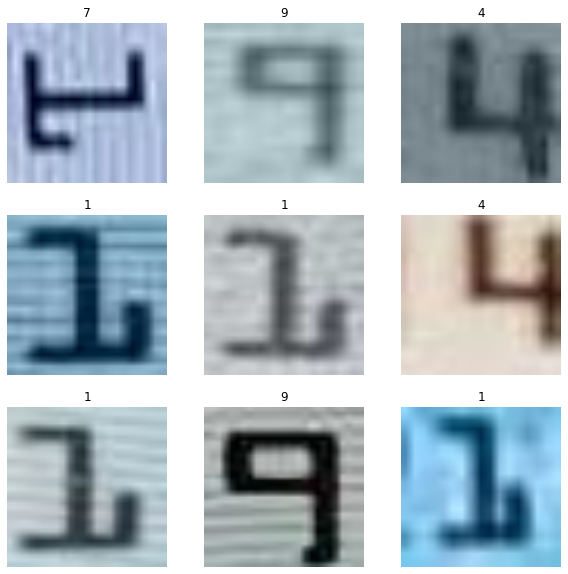

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # plt.title(class_names[labels[i]])
        plt.title(labels[i].numpy())
        plt.axis("off")

In [23]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))

Number of validation batches: 30


In [24]:
print('Number of train batches: %d' % tf.data.experimental.cardinality(train_ds))

Number of train batches: 118


In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [26]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

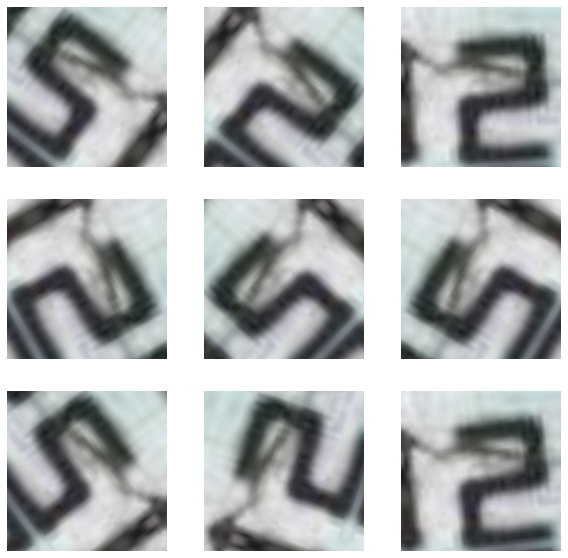

In [27]:
for image, _ in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [28]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [29]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [30]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SIZE = (160,160)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [31]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [32]:
base_model.trainable = False

In [33]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [34]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [35]:
prediction_layer = tf.keras.layers.Dense(len(class_names),activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 10)


In [36]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [37]:
base_learning_rate = 0.0001

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810 

In [39]:
len(model.trainable_variables)

2

In [40]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


30/30 [==============================] - 11s 290ms/step - loss: 2.7803 - accuracy: 0.0772


In [41]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.78
initial accuracy: 0.08


In [42]:
ts = time.time()
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)
print("Finished in {} s".format(time.time() - ts))

Epoch 1/10
118/118 [==============================] - 50s 393ms/step - loss: 2.3897 - accuracy: 0.1924 - val_loss: 1.8470 - val_accuracy: 0.3894
Epoch 2/10
118/118 [==============================] - 47s 396ms/step - loss: 1.7699 - accuracy: 0.3977 - val_loss: 1.4216 - val_accuracy: 0.6086
Epoch 3/10
118/118 [==============================] - 46s 392ms/step - loss: 1.4072 - accuracy: 0.5544 - val_loss: 1.1720 - val_accuracy: 0.7004
Epoch 4/10
118/118 [==============================] - 43s 365ms/step - loss: 1.1867 - accuracy: 0.6431 - val_loss: 1.0097 - val_accuracy: 0.7589
Epoch 5/10
118/118 [==============================] - 46s 388ms/step - loss: 1.0383 - accuracy: 0.6999 - val_loss: 0.9029 - val_accuracy: 0.7860
Epoch 6/10
118/118 [==============================] - 43s 364ms/step - loss: 0.9422 - accuracy: 0.7332 - val_loss: 0.8223 - val_accuracy: 0.8100
Epoch 7/10
118/118 [==============================] - 46s 390ms/step - loss: 0.8645 - accuracy: 0.7532 - val_loss: 0.7599 - val_ac

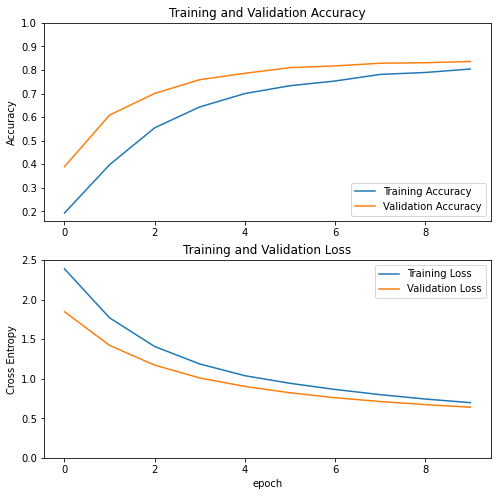

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [44]:
base_model.trainable = True

In [45]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [46]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
          metrics=['accuracy'])

In [47]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810 

In [48]:
len(model.trainable_variables)

56

In [53]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

ts = time.time()
history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)
print("Finished in {} s".format(time.time() - ts))

Epoch 10/20
118/118 [==============================] - 73s 615ms/step - loss: 0.0292 - accuracy: 0.9923 - val_loss: 0.0880 - val_accuracy: 0.9812
Epoch 11/20
118/118 [==============================] - 71s 601ms/step - loss: 0.0160 - accuracy: 0.9960 - val_loss: 0.0909 - val_accuracy: 0.9843
Epoch 12/20
118/118 [==============================] - 69s 589ms/step - loss: 0.0075 - accuracy: 0.9965 - val_loss: 0.1007 - val_accuracy: 0.9854
Epoch 13/20
118/118 [==============================] - 70s 592ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.0870 - val_accuracy: 0.9843
Epoch 14/20
118/118 [==============================] - 69s 586ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0820 - val_accuracy: 0.9864
Epoch 15/20
118/118 [==============================] - 70s 596ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0864 - val_accuracy: 0.9864
Epoch 16/20
118/118 [==============================] - 72s 610ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0924 -

In [54]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

TypeError: unsupported operand type(s) for +=: 'float' and 'list'

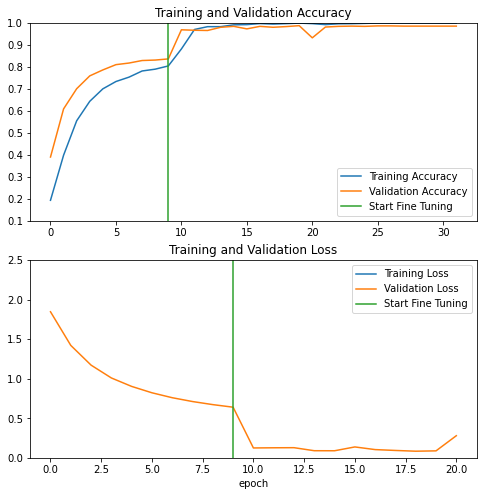

In [55]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.1, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 2.5])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [56]:
loss, accuracy = model.evaluate(val_ds)
print('Test accuracy :', accuracy)

30/30 [==============================] - 11s 354ms/step - loss: 0.0813 - accuracy: 0.9854
Test accuracy : 0.9853861927986145


In [57]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save(os.path.join(MODEL_PATH,'DR_MobileNetV2_v3.h5'))

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
